In [1]:
import os
os.getcwd()

os.chdir(os.path.join(os.environ["HOME"], "Code/jwst/"))

In [15]:
import os

from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from exotedrf import stage3
from exotedrf.plotting import make_2d_lightcurve_plot

os.environ['CRDS_PATH'] = './crds_cache'
os.environ['CRDS_SERVER_URL'] = 'https://jwst-crds.stsci.edu'

In [3]:
outdir_s2 = "/data/typhon2/hattie/jwst/wasp_96/pipeline_outputs_directory/Stage2/"
outdir_s3 = '/data/typhon2/hattie/jwst/wasp_96/pipeline_outputs_directory/Stage3/'

In [4]:
badpixstep_filenames = [
    outdir_s2 + "jw02734002001_04101_00001-seg001_nis_badpixstep.fits",
    outdir_s2 + "jw02734002001_04101_00001-seg002_nis_badpixstep.fits",
    outdir_s2 + "jw02734002001_04101_00001-seg003_nis_badpixstep.fits",
]

In [5]:

centroids = pd.read_csv(outdir_s2 + 'jw02734002001_04101_00001_nis_centroids.csv', comment='#')

step = stage3.Extract1DStep(badpixstep_filenames, extract_method='box', output_dir=outdir_s3,
                            st_teff=5540, st_logg=4.42, st_met=0.14)

# Here, we're using an aperture width of 30 pixels.
# We also pass the trace positions from above.

results = step.run(extract_width=30, centroids=centroids, save_results=True, force_redo=True)

2024-09-26 14:29:33.492 - exoTEDRF - INFO - Starting 1D extraction using the box method.
2024-09-26 14:29:33.897 - exoTEDRF - INFO - Performing simple aperture extraction.
2024-09-26 14:29:33.897 - exoTEDRF - INFO - Extracting Order 1


100%|██████████| 280/280 [00:14<00:00, 18.94it/s]


2024-09-26 14:29:48.685 - exoTEDRF - INFO - Extracting Order 2


100%|██████████| 280/280 [00:12<00:00, 21.73it/s]
2024-09-26 14:30:01,574 - stpipe.Extract1dStep - INFO - Extract1dStep instance created.
2024-09-26 14:30:03,069 - stpipe.Extract1dStep - INFO - Extract1dStep instance created.


2024-09-26 14:30:03.089 - exoTEDRF - INFO - Formatting extracted 1d spectra.
2024-09-26 14:30:03.089 - exoTEDRF - INFO - Refining the wavelength calibration.
2024-09-26 14:30:03.089 - exoTEDRF - INFO - File /data/typhon2/hattie/jwst/wasp_96/pipeline_outputs_directory/Stage3/phoenix_models/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits already downloaded.
2024-09-26 14:30:03.089 - exoTEDRF - INFO - File /data/typhon2/hattie/jwst/wasp_96/pipeline_outputs_directory/Stage3/phoenix_models/lte05500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits already downloaded.
2024-09-26 14:30:03.089 - exoTEDRF - INFO - File /data/typhon2/hattie/jwst/wasp_96/pipeline_outputs_directory/Stage3/phoenix_models/lte05500-4.00+1.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits already downloaded.
2024-09-26 14:30:03.089 - exoTEDRF - INFO - File /data/typhon2/hattie/jwst/wasp_96/pipeline_outputs_directory/Stage3/phoenix_models/lte05500-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits already downloaded.
2024-09-26 14:30:03.089 -

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2024-09-24T14:40:54.107' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw02734002001_04101_00001-seg001_nis_badpixstep.fits' / Name of the f
SDP_VER = '2024_1a '           / Data processing (DP) Software Version          
PRD_VER = 'PRDOPSSOC-066'      / S&OC Project Reference Database (PRD) Version  
OSS_VER = '008.004.008.000'    / Observatory Scheduling Software (OSS) Version  
GSC_VER = 'GSC30   '        

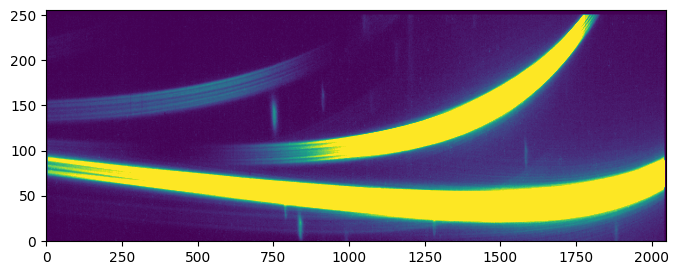

In [6]:
with fits.open(badpixstep_filenames[0]) as hdulist:
    badpixstep_data_0 = hdulist[1].data
    display(hdulist[0].header)
    plt.figure(figsize=(8, 3))
    plt.imshow(hdulist[1].data[0], aspect='auto', origin='lower',
               vmin=0, vmax=10)
    plt.show()

In [7]:
with fits.open(outdir_s3 + 'WASP-96_box_spectra_fullres.fits') as spec:
    for i in spec:
        display(i.header)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TARGET  = 'WASP-96 '           / Name of the target                             
INST    = 'NIRISS/SOSS'        / Instrument used to acquire the data            
DATE    = '2024-09-26T13:30:09' / UTC date file created                         
PIPELINE= 'exoTEDRF'           / Pipeline that produced this file               
AUTHOR  = 'MCR     '           / File author                                    
CONTENTS= 'Full resolution stellar spectra' / Description of file contents      
METHOD  = 'box     '           / Type of 1D extraction                          
WIDTH   =                   30 / Box width                                      

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                  280                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Wave Low O1'                                                         
UNITS   = 'Micron  '                                                            

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                  280                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Wave Up O1'                                                          
UNITS   = 'Micron  '                                                            

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                  280                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Flux O1 '                                                            
UNITS   = 'DN/s    '                                                            

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                  280                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Flux Err O1'                                                         
UNITS   = 'DN/s    '                                                            

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                  280                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Wave Low O2'                                                         
UNITS   = 'Micron  '                                                            

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                  280                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Wave Up O2'                                                          
UNITS   = 'Micron  '                                                            

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                  280                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Flux O2 '                                                            
UNITS   = 'DN/s    '                                                            

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                  280                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Flux Err O2'                                                         
UNITS   = 'DN/s    '                                                            

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                  280                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Time    '                                                            
UNITS   = 'BJD     '                                                            

In [8]:
with fits.open(outdir_s3 + 'WASP-96_box_spectra_fullres.fits') as spec:
    integration = 100
    wave1 = np.mean([spec[1].data[integration], spec[2].data[integration]], axis=0)  # Order 1 wavelengths
    wave2 = np.mean([spec[5].data[integration], spec[6].data[integration]], axis=0)  # Order 2 wavelengths

    order1 = spec[3].data  # Order 1 spectra
    order2 = spec[7].data  # Order 2 spectra

base = np.concatenate([np.arange(150), np.arange(100)-100]).astype(int) # Baseline ints

# Normalize the extracted spectra.

order1_norm = order1 / np.nanmedian(order1[base], axis=0)
order2_norm = order2 / np.nanmedian(order2[base], axis=0)

with fits.open(outdir_s3 + 'phoenix_models/lte05500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits') as spec:
    phoenix = spec[0].data


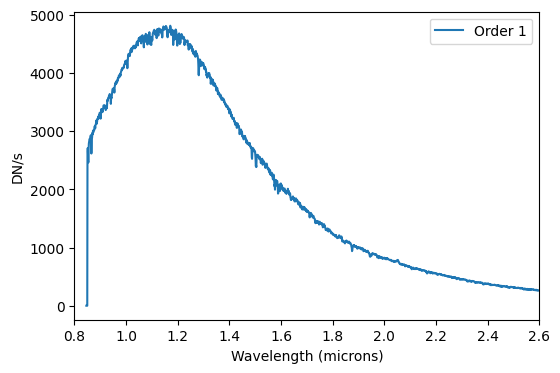

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(wave1, order1[0], label='Order 1')
# ax.plot(wave2, order2[0], label='Order 2')
ax.set_xlim(0.8, 2.6)
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('DN/s')
ax.legend()

In [10]:
badpixstep_data_0.shape

(100, 256, 2048)

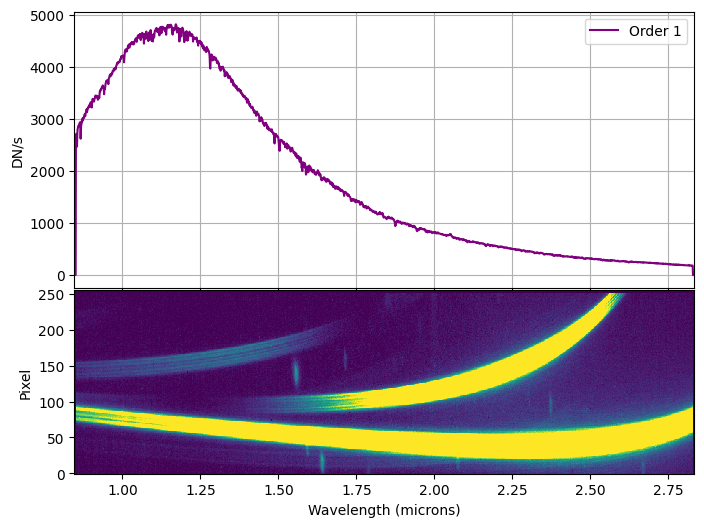

In [11]:
#plot the spectra with wave1 as the  x-axis labels of the image
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 2]})

axes[0].plot(wave1, order1[0], color='purple', label='Order 1')
axes[0].set_ylabel('DN/s')
axes[0].legend()
axes[0].grid()

axes[1].pcolormesh(np.flip(wave1), np.arange(0, 256, 1), badpixstep_data_0[0], vmin=0, vmax=10)
axes[1].set_xlabel('Wavelength (microns)')
axes[1].set_ylabel('Pixel')

plt.subplots_adjust(hspace=0.01)
plt.show()


In [12]:
np.arange(wave1[-1], wave1[0], 0.2)

array([0.8462576, 1.0462576, 1.2462576, 1.4462576, 1.6462576, 1.8462576,
       2.0462576, 2.2462576, 2.4462576, 2.6462576])

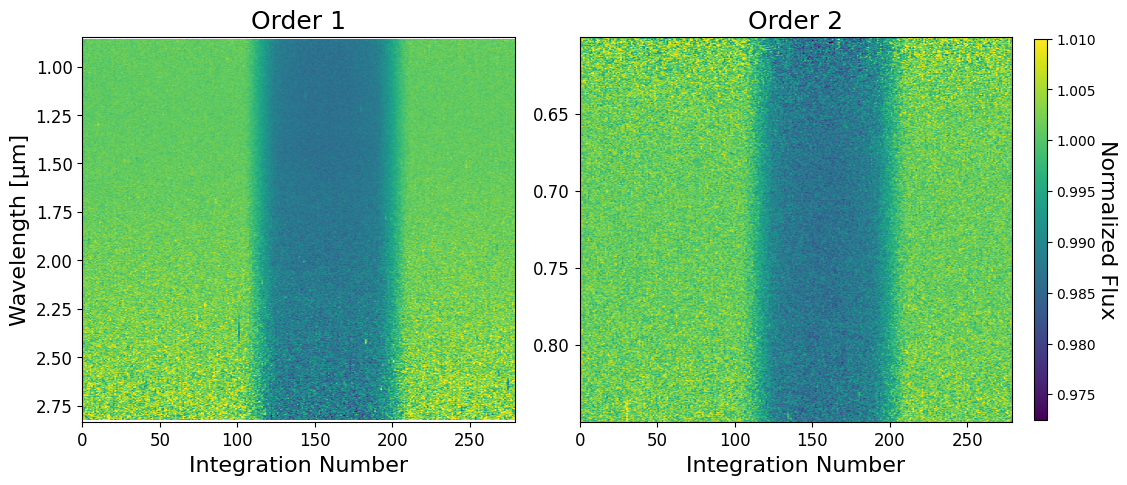

In [13]:
# For order 2, only the wavelengths from 0.6 -- 0.85µm are useable.

ii = np.where((wave2 >= 0.6) & (wave2 < 0.85))[0]

# Display the light curves.

kwargs = {'vmin': 0.9725, 'vmax': 1.01}
make_2d_lightcurve_plot(wave1, order1_norm, wave2[ii], order2_norm[:, ii], **kwargs)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2024-09-24T14:40:54.107' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw02734002001_04101_00001-seg001_nis_badpixstep.fits' / Name of the f
SDP_VER = '2024_1a '           / Data processing (DP) Software Version          
PRD_VER = 'PRDOPSSOC-066'      / S&OC Project Reference Database (PRD) Version  
OSS_VER = '008.004.008.000'    / Observatory Scheduling Software (OSS) Version  
GSC_VER = 'GSC30   '        

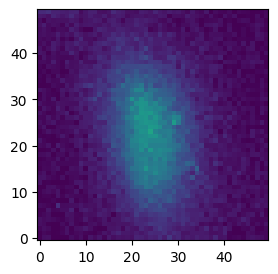

In [26]:
with fits.open(badpixstep_filenames[0]) as hdulist:
    badpixstep_data_0 = hdulist[1].data
    display(hdulist[0].header)
    plt.figure(figsize=(8, 3))
    plt.imshow(hdulist[1].data[0, 117:167, 730:780], origin='lower',
               vmin=0, vmax=10)
    plt.show()

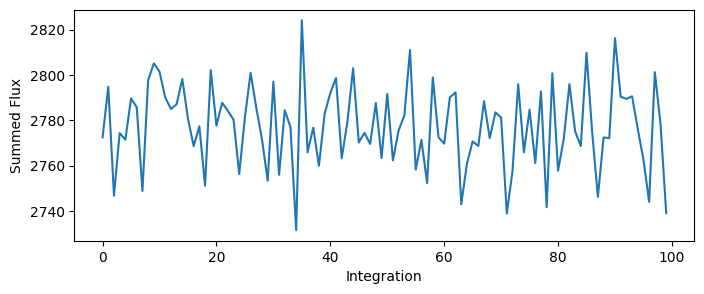

In [28]:
# make cutouts at data[i, 117:167, 730:780] for all integrations and all fits files and sum flux in each cutout
# to get the light curve

# Make a cutout of the data.

cutout = badpixstep_data_0[:, 117:167, 730:780]

# Sum the flux in the cutout.

flux = np.sum(cutout, axis=(1, 2))

# Plot the light curve.

plt.figure(figsize=(8, 3))
plt.plot(flux, '')
plt.xlabel('Integration')
plt.ylabel('Summed Flux')
plt.show()